In [1]:
%matplotlib widget

In [2]:
isdark = True

In [3]:
# initialization
from rayoptics.environment import *
from anytree.search import find_by_attr

In [4]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [5]:
app = AppManager(None)

# Open the model

In [6]:
app.model = open_model(root_pth/"codev/tests/questar35.seq")
opm = app.model
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']
print(f"{opm.ro_version=}")
print(f"rayoptics version={rayoptics.__version__}")

opm.ro_version='0.9.5.post1.dev3+gfa56c0e.d20241222'
rayoptics version=0.9.5.post1.dev3+gfa56c0e.d20241222


In [7]:
listobj(osp)

aperture: object epd; value=   3.50394
field: object angle; value=  0.250000
y =  0.000 ( 0.00) vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
y =  0.250 ( 1.00) vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
is_relative=False, is_wide_angle=False
central wavelength=  555.0000 nm
wavelength (weight) =  650.0000 (1.000),  555.0000 (2.000)*,  450.0000 (1.000)
focus shift=-0.05687840253417175



In [8]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+11       air             1      1.0000
    1:    -0.277967     0.284175     N-BK7             1      1.7520
    2:    -0.265659      6.61800       air             1      1.0000
 Stop:    -0.062198     -6.61800       air    reflect -1      1.0000
    4:    -0.265659      10.2153       air    reflect  1      1.0000
  Img:     0.000000      0.00000                       1      1.0000


In [9]:
sm.do_apertures = True

In [10]:
opm.update_model()

In [11]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+11       air             1  4.3634e+08
    1:    -0.277967     0.284175     N-BK7             1      1.7817
    2:    -0.265659      6.61800       air             1      1.8336
 Stop:    -0.062198     -6.61800       air    reflect -1      1.8457
    4:    -0.265659      10.2153       air    reflect  1     0.38287
  Img:     0.000000      0.00000                       1     0.22038


In [12]:
pt.list_model()

root
├── Object
├── E1
├── M1
├── M2
└── Image


In [13]:
E1 = pt.obj_by_name('E1')
E1.label = 'corrector'

In [14]:
E1.sd=1.875

In [15]:
M1 = pt.obj_by_name('M1')
M1.label = 'primary'
M1.hole_sd = 0.3757121532816294

In [16]:
M1.sd = 1.875

In [17]:
M2 = pt.obj_by_name('M2')
M2.label = 'secondary'

In [18]:
opm.update_model(src_model=em)

In [19]:
em.list_model()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: corrector (Element): Element: Spherical(c=-0.2779672329376499), Spherical(c=-0.2656588696905559), t=0.2842, sd=1.8750, glass: N-BK7
2: primary (Mirror): Mirror: Spherical(c=-0.06219776663591262), t=0.0938, sd=1.8750
3: secondary (Mirror): Mirror: Spherical(c=-0.2656588696905559), t=0.0191, sd=0.3829
4: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [20]:
pt.list_model()

root
├── Object
├── corrector
├── primary
├── secondary
└── Image


In [21]:
pt.list_tree_full()

root: #group#root
├── Object: #dummyifc#object
│   └── p: #profile
│       └── i0: #ifc
├── AG1: #space#airgap#object
│   └── t: #thic
│       └── g0: #gap
├── corrector: #element#lens
│   ├── p1: #profile
│   │   └── i1: #ifc
│   ├── t: #thic
│   │   └── g1: #gap
│   └── p2: #profile
│       └── i2: #ifc
├── AG2: #space#airgap
│   └── t: #thic
│       └── g2: #gap
├── primary: #element#mirror
│   └── p: #profile
│       └── i3: #ifc
├── AG3: #space#airgap
│   └── t: #thic
│       └── g3: #gap
├── secondary: #element#mirror
│   └── p: #profile
│       └── i4: #ifc
├── AG4: #space#airgap#image
│   └── t: #thic
│       └── g4: #gap
└── Image: #dummyifc#image
    └── p: #profile
        └── i5: #ifc


In [22]:
opm.update_model()

update_patches
update_patches


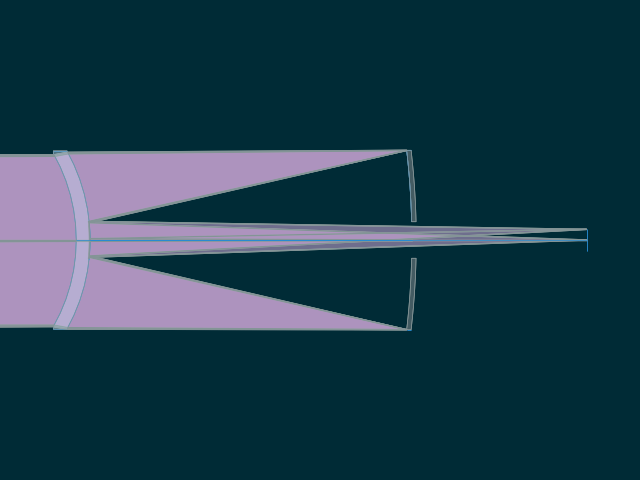

In [23]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, offset_factor=0.1,
                        do_draw_rays=True, do_paraxial_layout=False, is_dark=isdark).plot()

## List the sequential model

In [25]:
sm.list_model()

              c            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+11       air             1  4.3634e+08
    1:    -0.277967     0.284175     N-BK7             1      1.7817
    2:    -0.265659      6.61800       air             1      1.8336
 Stop:    -0.062198     -6.61800       air    reflect -1      1.8457
    4:    -0.265659      10.2153       air    reflect  1     0.38287
  Img:     0.000000      0.00000                       1     0.22038


## Update the model

In [26]:
opm.update_model()

In [27]:
pt.list_tree()

root
├── Object
│   └── p
│       └── i0
├── AG1
│   └── t
│       └── g0
├── corrector
│   ├── p1
│   │   └── i1
│   ├── t
│   │   └── g1
│   └── p2
│       └── i2
├── AG2
│   └── t
│       └── g2
├── primary
│   └── p
│       └── i3
├── AG3
│   └── t
│       └── g3
├── secondary
│   └── p
│       └── i4
├── AG4
│   └── t
│       └── g4
└── Image
    └── p
        └── i5


## List the paraxial model and first order properties

In [28]:
pm.first_order_data()

efl                50.5
f                  50.5
f'                 50.5
ffl                -212
pp1              -161.5
bfl               10.22
ppk              -40.28
pp sep            121.5
f/#               14.41
m             -5.05e-10
red           -1.98e+09
obj_dist          1e+11
obj_ang            0.25
enp_dist          6.351
enp_radius        1.752
na obj        1.752e-11
n obj                 1
img_dist          10.22
img_ht           0.2203
exp_dist         -1.465
exp_radius       0.4052
na img         -0.03469
n img                 1
optical invariant     0.007644


In [29]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0 -4.36335e+08  1.75197e-11   0.00436335             0        1e+11      1.00000    dummy
 1:      1.75197   -0.0277129     0.252394  0.000370945    -0.1440632      0.18717      1.51827    transmit
 2:      1.79921   -0.0276435   0.00467172   0.00417701     0.1376841        6.618      1.00000    transmit
 3:      1.83013 -1.74368e-08    -0.222988   0.00417701     0.1243955        6.618     -1.00000    reflect
 4:     0.354393    0.0276434   -0.0346924    0.0188645    -0.5313177      10.2153      1.00000    reflect
 5:  8.84747e-10     0.220349   -0.0346924    0.0188645             0            0      1.00000    dummy


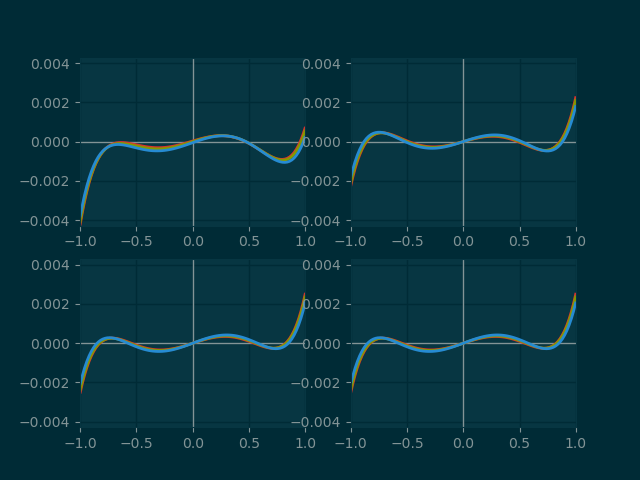

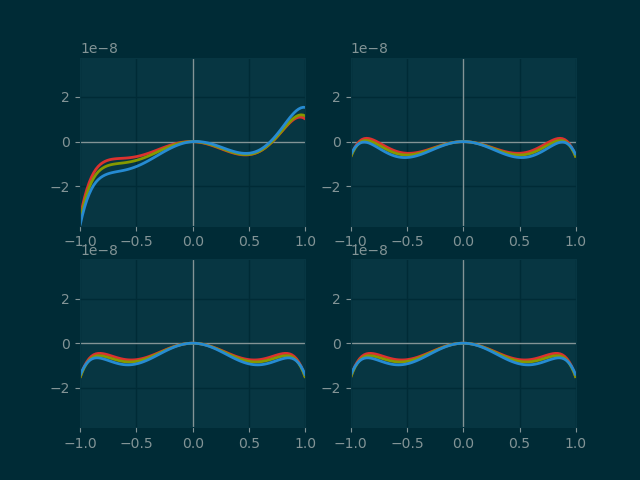

In [30]:
abr_fan_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
wav_fan_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()

update_patches
update_patches


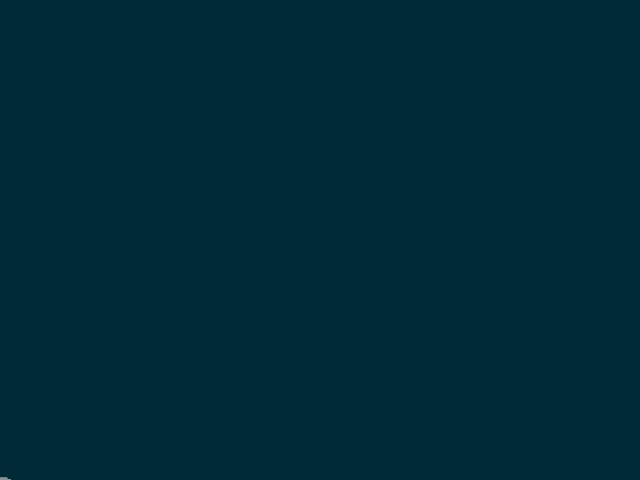

In [31]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, offset_factor=0.1,
                        do_draw_rays=True, do_paraxial_layout=False, is_dark=isdark)

update_patches
update_patches


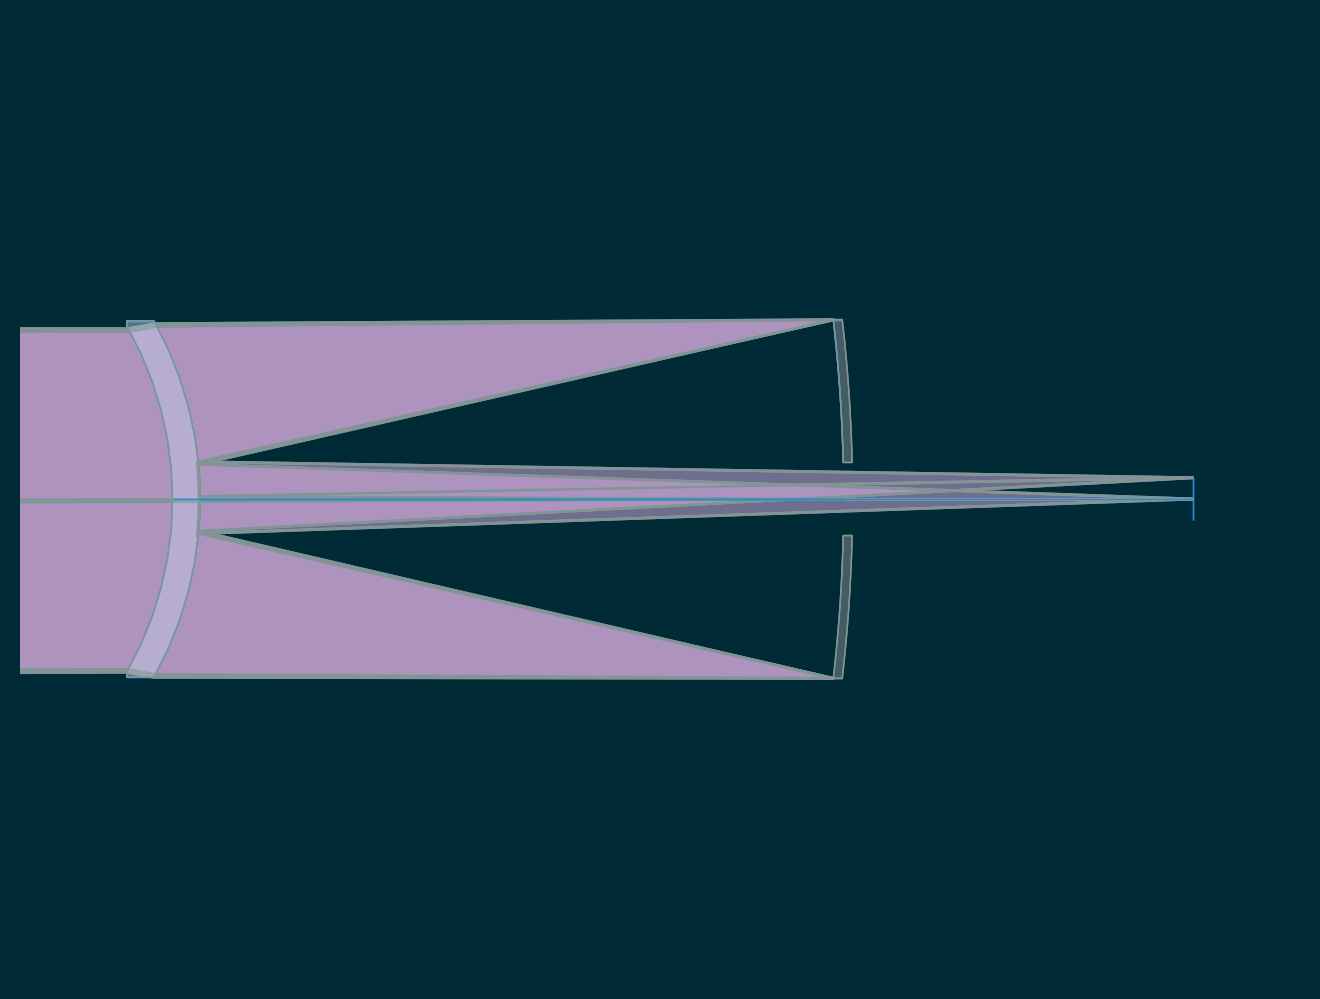

In [32]:
layout_plt.refresh()

In [33]:
pm.first_order_data()

efl                50.5
f                  50.5
f'                 50.5
ffl                -212
pp1              -161.5
bfl               10.22
ppk              -40.28
pp sep            121.5
f/#               14.41
m             -5.05e-10
red           -1.98e+09
obj_dist          1e+11
obj_ang            0.25
enp_dist          6.351
enp_radius        1.752
na obj        1.752e-11
n obj                 1
img_dist          10.22
img_ht           0.2203
exp_dist         -1.465
exp_radius       0.4052
na img         -0.03469
n img                 1
optical invariant     0.007644


In [34]:
layout_plt.ele_bbox

array([[-0.47220848, -1.84565091],
       [10.49945964,  1.84565091]])

In [35]:
layout_plt.layout.system_length(layout_plt.ele_bbox, 0.1)

(np.float64(21.186952748805417), np.float64(2.1186952748805417))

In [36]:
print(opm.specsheet)

infinite conjugates:
imager: IdealImager(m=np.float64(-0.0), s=-inf, sp=np.float64(50.49999999999967), tt=np.float64(inf), f=np.float64(50.49999999999967))
imager inputs: {'s': -inf}
frozen imager inputs: [True, True, True, True, False]
etendue inputs:
  field:    {'object': {'angle': 0.25}, 'image': {}}
  aperture: {'object': {'epd': 3.503937007874016}, 'image': {}}
etendue values:
  field:    {'object': {'angle': 0.25}, 'image': {'height': np.float64(0.2203492164454277)}}
  aperture:
    object: {'epd': 3.503937007874016, 'NA': 0, 'f/#': 0}
    image:  {'f/#': np.float64(-14.412359550561703), 'NA': np.float64(0.034692445622515236), 'epd': np.float64(-3.503937007874016)}


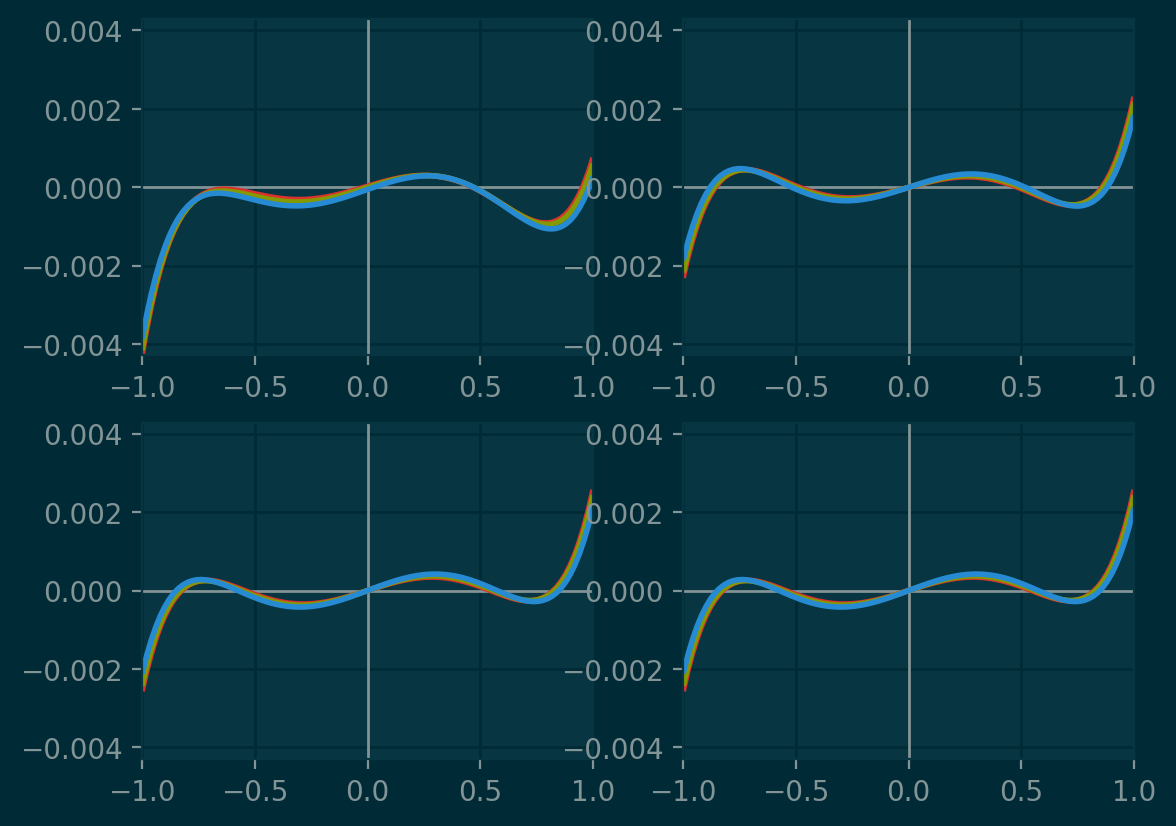

In [37]:
abr_fan_plt.refresh()

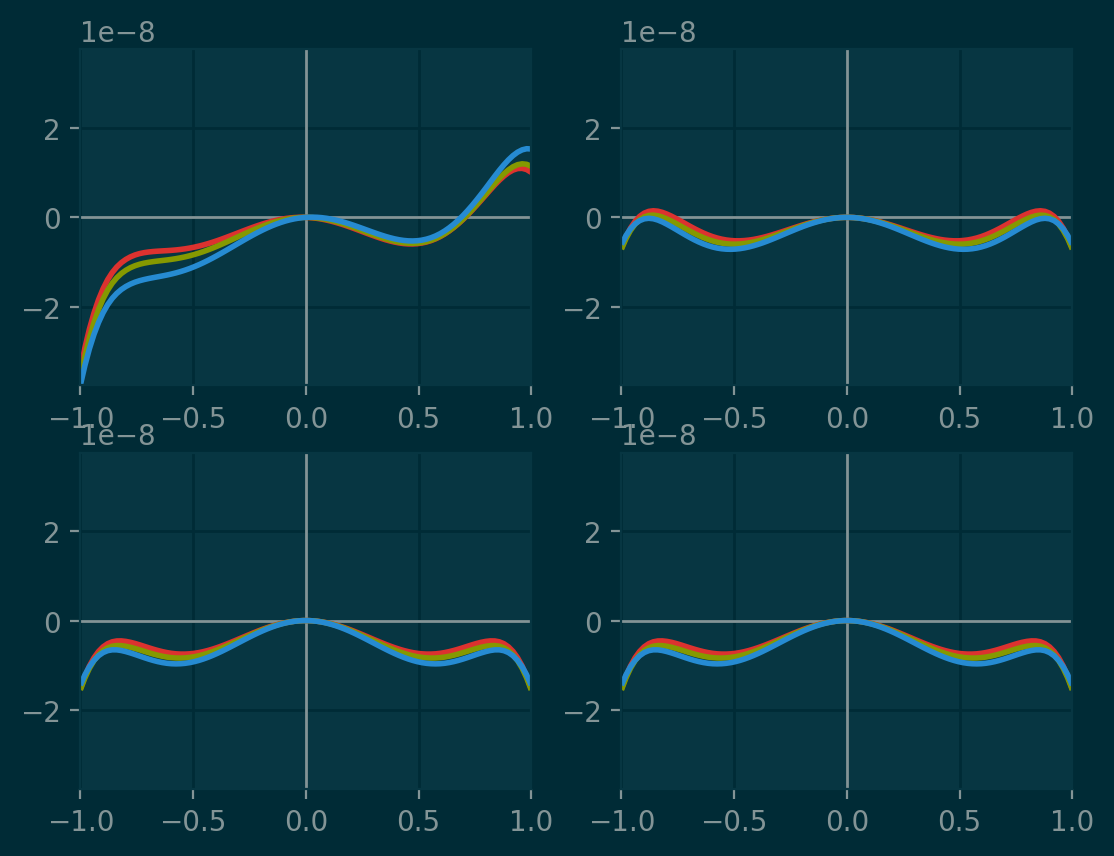

In [38]:
wav_fan_plt.refresh()

## Trace and display a wavefront as a contour plot

In [39]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)
grid=sm.trace_wavefront(fld, wvl, foc, num_rays=64)

In [40]:
grid = np.rollaxis(grid, 2)
max_val = max(np.max(grid[2]), -np.min(grid[2])); max_val

np.float64(3.419180099633415e-08)

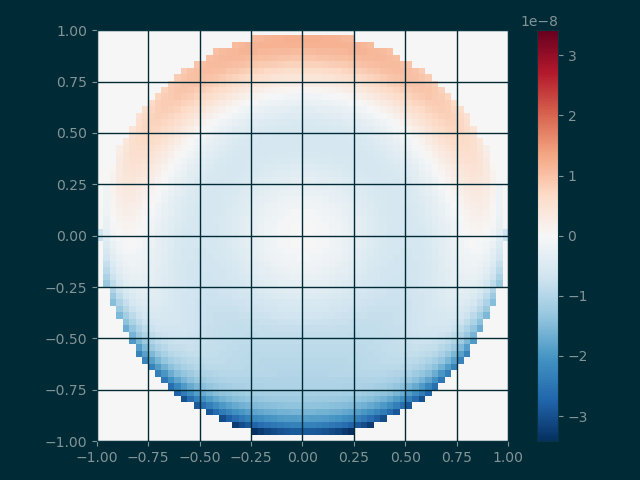

In [41]:
fig, axes = plt.subplots()
#fig, axes = plt.subplots(1, 2, figsize=(8, 4))
im = axes.imshow(grid[2].T, cmap=mpl.cm.RdBu_r, vmin=-max_val, vmax=max_val, extent=[-1, 1, -1, 1], origin='lower')
#im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=axes)
fig.tight_layout()

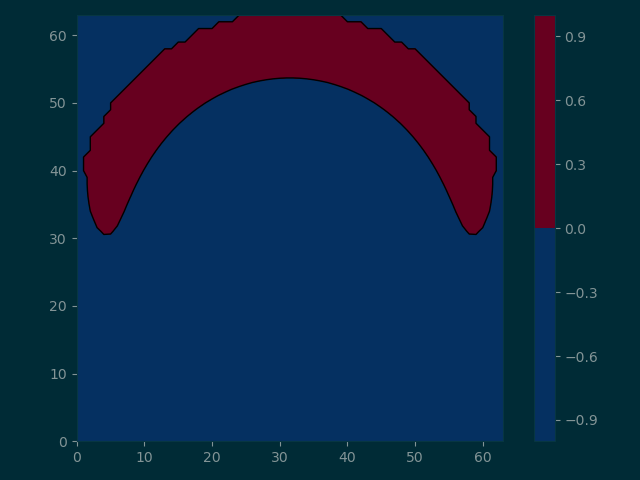

In [42]:
fig, ax = plt.subplots()
vmin = -max_val
vmax = max_val
levs = np.linspace(np.floor(vmin), np.ceil(vmax), num=21)

ax.contour(grid[2].T, levs, colors='black', linewidths=1, vmin=vmin, vmax=vmax)
cs = ax.contourf(grid[2].T, levs, cmap=mpl.cm.RdBu_r, vmin=vmin, vmax=vmax)
fig.colorbar(cs)
ax.set_aspect('equal')
fig.tight_layout()
plt.show()

In [43]:
em.list_model()

0: Object (DummyInterface): Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode='dummy')
1: corrector (Element): Element: Spherical(c=-0.2779672329376499), Spherical(c=-0.2656588696905559), t=0.2842, sd=1.8336, glass: N-BK7
2: primary (Mirror): Mirror: Spherical(c=-0.06219776663591262), t=0.0923, sd=1.8457
3: secondary (Mirror): Mirror: Spherical(c=-0.2656588696905559), t=0.0191, sd=0.3829
4: Image (DummyInterface): Surface(lbl='Img', profile=Spherical(c=0.0), interact_mode='dummy')


In [44]:
matches = sm.find_matching_ifcs(); matches

coincident surfs: 2 - 4


[(2, 4)]

In [45]:
pt.list_tree()

root
├── Object
│   └── p
│       └── i0
├── AG1
│   └── t
│       └── g0
├── corrector
│   ├── p1
│   │   └── i1
│   ├── t
│   │   └── g1
│   └── p2
│       └── i2
├── AG2
│   └── t
│       └── g2
├── primary
│   └── p
│       └── i3
├── AG3
│   └── t
│       └── g3
├── secondary
│   └── p
│       └── i4
├── AG4
│   └── t
│       └── g4
└── Image
    └── p
        └── i5
